
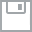
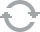
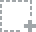
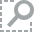
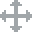
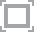
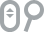
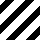
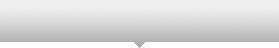
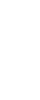
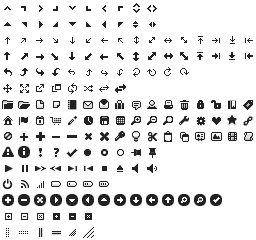
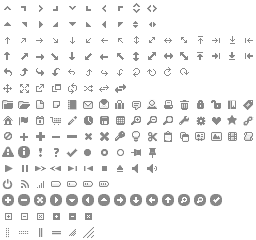
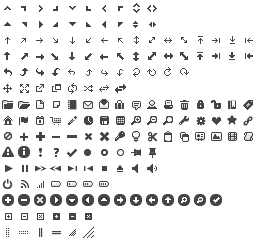
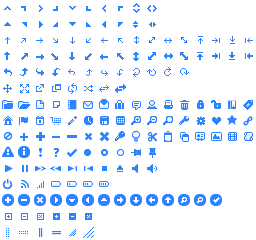
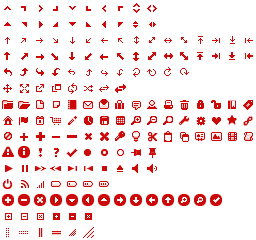
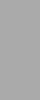
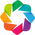
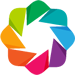

In [95]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

import json

from bokeh.palettes import *
from tqdm import tqdm
import pandas as pd
import numpy as np

In [96]:
insiders = ["AAM0658", "AJR0932", "BDV0168", "BIH0745", "BLS0678", "BTL0226", "CAH0936", "DCH0843", "EHB0824", "EHD0584", "FMG0527", "FTM0406", "GHL0460", "HJB0742", "JMB0308", "JRG0207", "KLH0596", "KPC0073", "LJR0523", "LQC0479", "MAR0955", "MAS0025", "MCF0600", "MYD0978", "PPF0435", "RAB0589", "RGG0064", "RKD0604", "TAP0551", "WDD0366", "AAF0535", "ABC0174", "AKR0057", "CCL0068", "CEJ0109", "CQW0652", "DIB0285", "DRR0162", "EDB0714", "EGD0132", "FSC0601", "HBO0413", "HXL0968", "IJM0776", "IKR0401", "IUB0565", "JJM0203", "KRL0501", "LCC0819", "MDH0580", "MOS0047", "NWT0098", "PNL0301", "PSF0133", "RAR0725", "RHL0992", "RMW0542", "TNM0961", "VSS0154", "XHW0498", "BBS0039", "BSS0369", "CCA0046", "CSC0217", "GTD0219", "JGT0221", "JLM0364", "JTM0223", "MPM0220", "MSO0222"]

def getRocPoints(userScores):
    rocPoints = []
    thresholds = []

    users = userScores.keys()

    T=0
    while True:
        anomUsers = set()
        anomWeeks = []
        for user in users:
            for index, weekScore in enumerate(userScores[user]):
                if weekScore > T :
                    anomUsers.add(user)
                    anomWeeks.append( (index, weekScore) )

        if len(anomUsers) == 0:
            break
        if len(anomUsers) == 1:
            print (anomUsers)
            print (anomWeeks)

        insiders_caught = 0
        for insider in insiders:
            if insider in anomUsers:
                insiders_caught += 1

        true_positive = insiders_caught/len(insiders)
        false_positive = (len(anomUsers)-insiders_caught)/len(users)
        rocPoints.append( (false_positive, true_positive) )
        thresholds.append(T)
        T+=5
        
    # why is everything an iterator...
    return list(reversed(rocPoints)), list(reversed(thresholds))

In [97]:
def getAUC(rocPoints):
    auc = 0
    prev = (0,0)
    for x in rocPoints:
        auc += (x[0]-prev[0])*(prev[1]+x[1])/2
        prev = x
    return auc

In [98]:
files = [ ("userScores_simple_r42_0.05_inertia_v2.json", "10 States") ]

In [99]:
userScores = json.load(open("userScores_simple_r42_0.05_inertia_v2.json"))

In [30]:
for index, score in enumerate(userScores["MCF0600"], start=6):
    print(index, score)

6 59.185448268997376
7 55.95688116777424
8 42.76793539833929
9 81.9155967369949
10 110.11997477890507
11 45.778618001711024
12 52.1126224139616
13 79.39768699793503
14 40.55070754194203
15 61.68735364205598
16 104.12217625702536
17 47.21588711291946
18 44.27247086621186
19 32.39535579624814
20 143.5393810780365
21 83.02460246514813
22 127.38117648208261
23 61.645925859441185
24 28.514455177954677
25 82.44785369295853
26 65.21747485795213
27 63.51561139700097
28 122.7872572173362
29 47.59850398739639
30 70.91684058491835
31 70.45748829505696
32 42.15918142595147
33 82.8914565342719
34 53.3682646771683
35 49.797449821575846
36 140.96449536682383
37 57.812925198871575
38 70.85678629522421
39 10967.376803005725
40 248.59305723490297
41 81.18024874836671
42 45.98910932926472


In [121]:
p = figure()
p.title = "User \"MCF0600\" Predicted Probabilities"
p.xaxis.axis_label = "Week"
p.yaxis.axis_label = "-Log Probability"

results = userScores["MCF0600"]

p.line(range(6,43), results, line_width=2)
p.axis.axis_label_text_font_size = "20pt"
p.title_text_font_size = "22pt"
p.legend.label_text_font_size = "16pt"
p.axis.major_label_text_font_size = "14pt"
show(p)

In [10]:
p = figure(x_range=(0,1))
p.title = "Varying Inertia"
p.xaxis.axis_label = "False Positive %"
p.yaxis.axis_label = "Threshold"

def drawRoc(rocPoints, p, c, name):

    xp = list(map(lambda x : x[0], rocPoints))
    yp = list(map(lambda x : x[1], rocPoints))

    p.line(xp,yp, line_color=c, legend=name, line_width=2)
    # p.scatter(xp,yp, marker="x", size=10, color=c)

p.line([0,1],[0,1],color="black")

colors = list(reversed(Spectral11))
colors = list(reversed(['#9e0142',
 '#d53e4f',
 '#f46d43',
 '#fdae61',
 '#fee08b',
 'gold',
 'seagreen',
 '#abdda4',
 '#66c2a5',
 '#3288bd',
 '#5e4fa2']))
# colors = ["brown", "red", "orange", "green", "cyan", "blue", "purple", "magenta", "pink", "seagreen", "gold"]
cc = 0

for file, name in reversed(files):
    userScores = json.load(open(file))
    roc,ts = getRocPoints(userScores)
    color = colors[cc]
    cc+=1
    ps = [(a[1],b) for a,b in zip(roc,ts)]
    drawRoc(ps, p, color, name)
    print("Finished:",name,flush=True)
#     print(name,"AUC:",getAUC(roc),flush=True)
    
p.legend.orientation = "top_right"
show(p)

{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.376803005725)]
{'MCF0600'}
[(33, 10967.3

In [73]:
feature_map = {'Connect': 2,
 'Disconnect': 3,
 'Email': 5,
 'File': 6,
 'Logoff': 1,
 'Logon': 0,
 'Website': 4}

In [77]:
number_to_feature = {v:k for k,v in feature_map.items()}
number_to_feature

{0: 'Logon',
 1: 'Logoff',
 2: 'Connect',
 3: 'Disconnect',
 4: 'Website',
 5: 'Email',
 6: 'File'}

In [92]:
joint = pd.read_hdf("C:/Users/tabzr/Documents/CMU Dataset/r4.2/r42_features_simple.h5", "table")

In [93]:
users = np.unique(joint.index.values)
print("There are", users.size, "users")
num_features = np.unique(joint["feature"].values).size
print("Using", num_features, "features")

There are 1000 users
Using 7 features


In [101]:
userFrame = joint.loc["MCF0600"]

In [102]:
weekGrouping = pd.Grouper(key="date", freq="1W")
timeGrouping = userFrame.groupby(weekGrouping)

In [103]:
threat = []
for index, (name, group) in enumerate(timeGrouping, start=1):
    print(index, group)
    if index==39:
        threat = group

1                        date  feature
user                                
MCF0600 2010-01-03 08:22:00        0
MCF0600 2010-01-03 08:43:17        4
MCF0600 2010-01-03 13:07:42        4
MCF0600 2010-01-03 14:12:40        4
MCF0600 2010-01-03 14:27:00        4
MCF0600 2010-01-03 16:05:12        4
MCF0600 2010-01-03 16:06:55        4
MCF0600 2010-01-03 16:43:15        4
MCF0600 2010-01-03 18:19:39        4
MCF0600 2010-01-03 18:31:00        4
MCF0600 2010-01-03 18:37:42        4
MCF0600 2010-01-03 18:38:27        5
MCF0600 2010-01-03 18:40:00        1
2                        date  feature
user                                
MCF0600 2010-01-04 08:30:00        0
MCF0600 2010-01-04 08:46:53        4
MCF0600 2010-01-04 08:58:21        4
MCF0600 2010-01-04 09:39:37        5
MCF0600 2010-01-04 09:39:38        4
MCF0600 2010-01-04 10:48:24        4
MCF0600 2010-01-04 11:55:41        4
MCF0600 2010-01-04 13:31:07        4
MCF0600 2010-01-04 13:53:59        4
MCF0600 2010-01-04 15:14:45       

In [104]:
matrices = np.load("r4.2_simple_matrices.npy")
userMatrices = matrices.item()

In [105]:
threat

,date,feature
user,,
MCF0600,2010-09-20 01:17:33,0
MCF0600,2010-09-20 01:22:17,2
MCF0600,2010-09-20 01:24:51,6
MCF0600,2010-09-20 01:26:28,3
MCF0600,2010-09-20 01:31:58,2
MCF0600,2010-09-20 01:32:46,6
MCF0600,2010-09-20 01:33:40,6
MCF0600,2010-09-20 01:33:55,6
MCF0600,2010-09-20 01:33:57,3


In [106]:
t,e,s = userMatrices["MCF0600"][38]

In [107]:
from HiddenMarkovModel import HiddenMarkovModel

In [108]:
threatseq = threat["feature"].values
threatseq

array([0, 2, 6, 3, 2, 6, 6, 6, 3, 2, 3, 2, 6, 6, 3, 2, 6, 3, 2, 6, 6, 6, 6,
       6, 6, 6, 6, 3, 2, 6, 6, 6, 6, 6, 4, 6, 6, 6, 3, 2, 6, 6, 3, 2, 6, 6,
       3, 1, 0, 4, 4, 4, 0, 1, 4, 4, 4, 4, 5, 4, 4, 1, 0, 2, 4, 3, 4, 1, 0,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 1, 0, 2, 4, 3, 4, 1, 0, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 1, 0, 2, 4, 3, 4, 1, 0, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       0, 1, 4, 1, 0, 4, 4, 4, 4, 4, 4, 5, 4, 1, 0, 2, 6, 4, 3, 2, 6, 6, 6,
       4, 6, 3, 2, 6, 6, 6, 6, 6, 6, 6, 6, 3, 2, 6, 6, 6, 6, 3, 2, 6, 3, 6,
       2, 6, 6, 3, 2, 6, 6, 6, 3, 4, 2, 6, 6, 6, 3, 1, 0, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 1], dtype=int64)

In [116]:
list(map(lambda x: number_to_feature[x], threatseq[0:67]))

['Logon',
 'Connect',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'File',
 'Disconnect',
 'Connect',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'File',
 'File',
 'File',
 'File',
 'File',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'File',
 'File',
 'File',
 'Website',
 'File',
 'File',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'Disconnect',
 'Connect',
 'File',
 'File',
 'Disconnect',
 'Logoff',
 'Logon',
 'Website',
 'Website',
 'Website',
 'Logon',
 'Logoff',
 'Website',
 'Website',
 'Website',
 'Website',
 'Email',
 'Website',
 'Website',
 'Logoff',
 'Logon',
 'Connect',
 'Website',
 'Disconnect',
 'Website']

In [109]:
model = HiddenMarkovModel.HMM(10, t,e,s)
model.sequence_log_probability(threatseq)

-10967.376803005725

In [120]:
dayGrouping = pd.Grouper(key="date", freq="1D")
days = threat.groupby(dayGrouping)

for name,group in days:
    seq = group["feature"].values
    print(list(map(lambda x: number_to_feature[x], group["feature"])), model.sequence_log_probability(seq))
    print()

['Logon', 'Connect', 'File', 'Disconnect', 'Connect', 'File', 'File', 'File', 'Disconnect', 'Connect', 'Disconnect', 'Connect', 'File', 'File', 'Disconnect', 'Connect', 'File', 'Disconnect', 'Connect', 'File', 'File', 'File', 'File', 'File', 'File', 'File', 'File', 'Disconnect', 'Connect', 'File', 'File', 'File', 'File', 'File', 'Website', 'File', 'File', 'File', 'Disconnect', 'Connect', 'File', 'File', 'Disconnect', 'Connect', 'File', 'File', 'Disconnect', 'Logoff', 'Logon', 'Website', 'Website', 'Website', 'Logon', 'Logoff', 'Website', 'Website', 'Website', 'Website', 'Email', 'Website', 'Website', 'Logoff', 'Logon', 'Connect', 'Website', 'Disconnect', 'Website'] -5453.684060762828

['Logoff', 'Logon', 'Website', 'Website', 'Website', 'Website', 'Website', 'Website', 'Email', 'Website', 'Website', 'Website', 'Logoff'] -121.78183314156917

['Logon', 'Connect', 'Website', 'Disconnect', 'Website', 'Logoff', 'Logon', 'Website', 'Website', 'Website', 'Website', 'Website', 'Website', 'Webs

In [42]:
s[9]

1.0

In [55]:
import networkx as nx

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline 

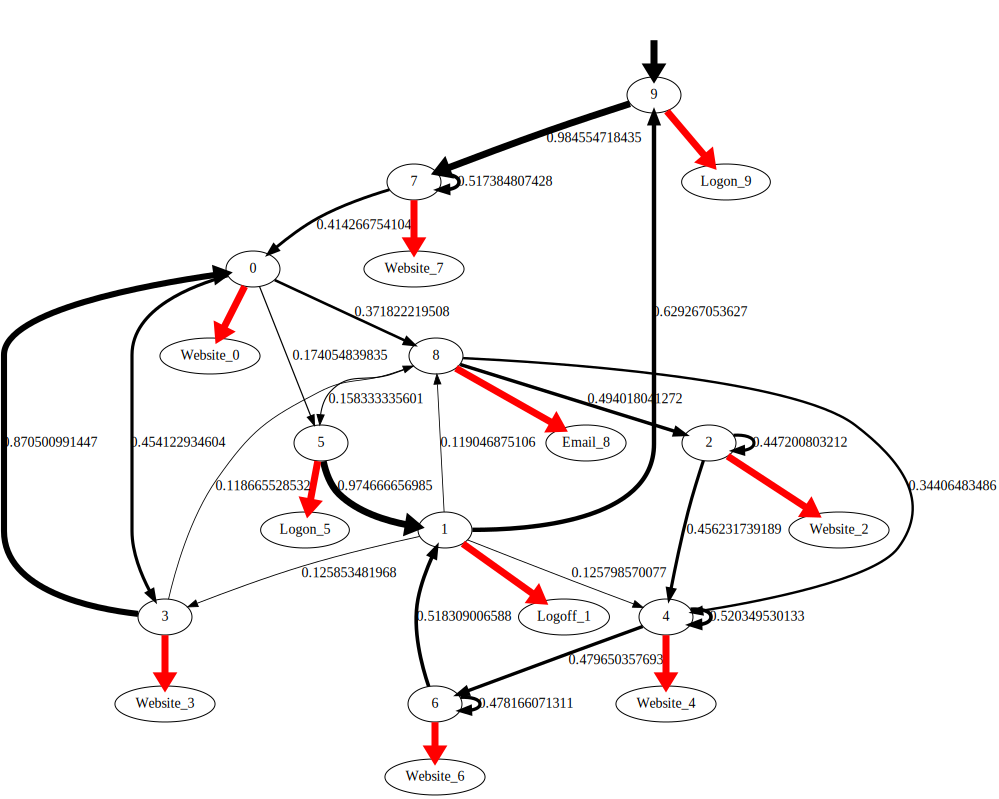

In [113]:
G = gv.Digraph()
width = 7
for i in reversed(range(0,10)):
    G.node(str(i))
for x in range(0,10):
    for y in range(0,10):
        if t[x][y] > 0.1:
            G.edge(str(x),str(y),penwidth=str(t[x][y]*width),label=str(t[x][y]),width=str(t[x][y]*100))
            
for x in range(0,10):
    for z in range(0,7):
        if e[x][z] > 0.01:
            G.node(number_to_feature[z]+"_"+str(x))
            G.edge(str(x),number_to_feature[z]+"_"+str(x),penwidth=str(e[x][z]*width), color="red")
#Starting state
G.edge("Start", str(9), penwidth=str(1*width))
G.node("Start", style="invis")
# print(G.source)
G

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


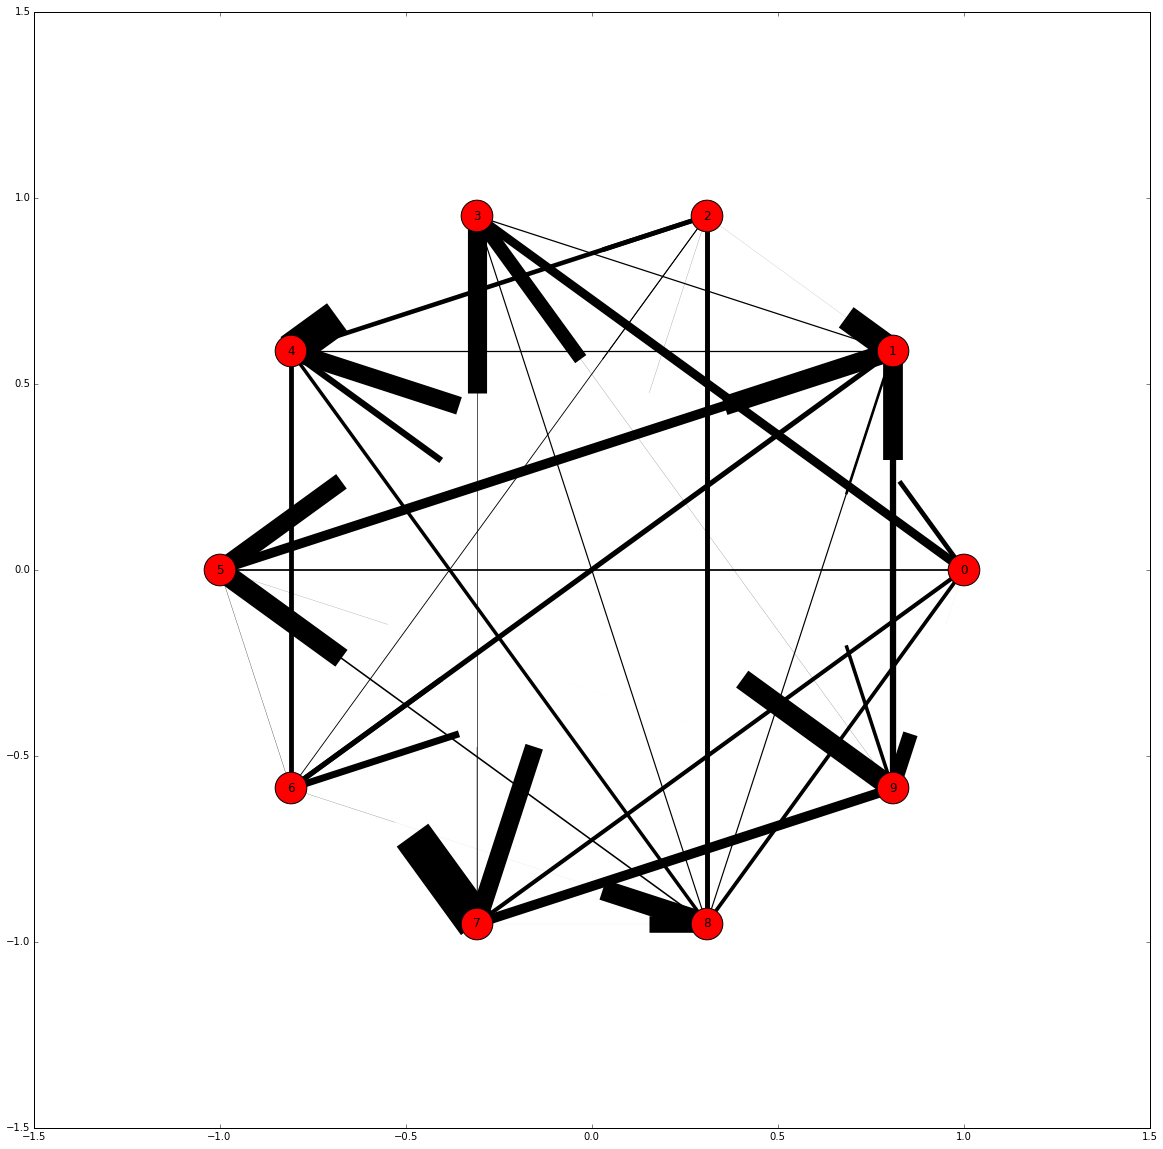

In [97]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, nx.circular_layout(G),node_size=1000)
nx.draw_networkx_labels(G, nx.circular_layout(G))
edges = G.edges()
edgeWeights = [G[u][v]["weight"]*10 for u,v in edges]
nx.draw_networkx_edges(G, nx.circular_layout(G), width=edgeWeights)
plt.show()

In [3]:
import graphviz as gv